In [33]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import re
import matplotlib.pyplot as plt

#### Determine which movies have the most ratings, and select top_n of them for a subset of data.

In [74]:
# Get the list of only movies:
MoviesOnly_df = pd.read_csv('MoviesOnly.csv')
MoviesOnly = list(MoviesOnly_df.NetflixIds)
#print(f"mv_{MoviesOnly[0]:07}.txt")
MoviesOnly = [f"mv_{i:07}.txt" for i in MoviesOnly]
print(len(MoviesOnly))

7774


In [75]:
# Initialize empty dictionary of ratings
netflix_ratings = {'movieID':[], 'num_ratings':[]}

ratings_files = os.listdir('training_set/')[:]
print(len(ratings_files))
for x,rating_file in enumerate(ratings_files):
    if rating_file in MoviesOnly:
        if x%1000==0:
            print(x/len(ratings_files))
        with open('training_set/'+rating_file) as f:
            for i,line in enumerate(f):
                if i == 0:
                    # Get the movie ID
                    mID = re.findall('([0-9]*):',line)[0]

            netflix_ratings['movieID'].append(mID)
            netflix_ratings['num_ratings'].append(i+1)

17770
0.056274620146314014
0.11254924029262803
0.7315700619020822
0.9566685424873382


In [76]:
len(netflix_ratings['num_ratings'])

7703

In [77]:
df = pd.DataFrame(netflix_ratings)

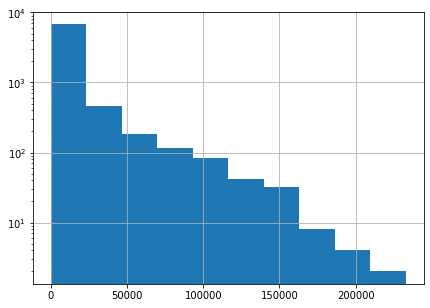

In [78]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)

df.num_ratings.hist(log=True)

In [82]:
top_n = 2500
df = df.sort_values(by='num_ratings',ascending=False)
highest_count_of_ratings = df.iloc[:top_n,:]

In [84]:
highest_count_of_ratings.to_csv("subset.csv")